In [6]:
import cantera as ct
from IPython.display import Image
from sbr import sbr
%matplotlib inline

# get current RMG model:
rmg_model_folder = "../../../meOH-synthesis/"
cti_file_path = rmg_model_folder + "base/cantera/chem_annotated.cti"

In [7]:
#######################################################################
# Input Parameters for combustor
#######################################################################
          
# sbr_tran = sbr(
#     cti_file_path,
#     rmg_model_folder, 
#     t_array=[528],
#     p_array=[75],
#     v_array=[0.00424],
#     h2_array=[0.75],
#     co2_array=[0.5],
#     rtol=1.0e-11,
#     atol=1.0e-22,
#     reactor_type=0,
#     energy="off",
#     sensitivity=False,
#     sensatol=1e-6,
#     sensrtol=1e-6,
#     reactime=1e5,
#     grabow=False,
# )

In [8]:
# sbr_tran.run_reactor_transient()

In [7]:
sbr_ss = sbr(
    cti_file_path,
    rmg_model_folder, 
    t_array=[528],
    p_array=[75],
    v_array=[0.00424],
    h2_array=[0.75],
    co2_array=[0.5],
    rtol=1.0e-11,
    atol=1.0e-22,
    reactor_type=0,
    energy="off",
    sensitivity=False,
    sensatol=1e-6,
    sensrtol=1e-6,
    reactime=1e5,
    grabow=False,
)

In [8]:
sbr_ss.run_reactor_ss()

Graph saved to: /Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38d_added_gitignore/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_C_gas_end-pretty.dot
Wrote graphviz input file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38d_added_gitignore/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_C_gas_end.dot'.
Wrote graphviz output file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38d_added_gitignore/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_C_gas_end.png'.
Graph saved to: /Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38

Wrote graphviz output file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38d_added_gitignore/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_X_surface1_end.png'.


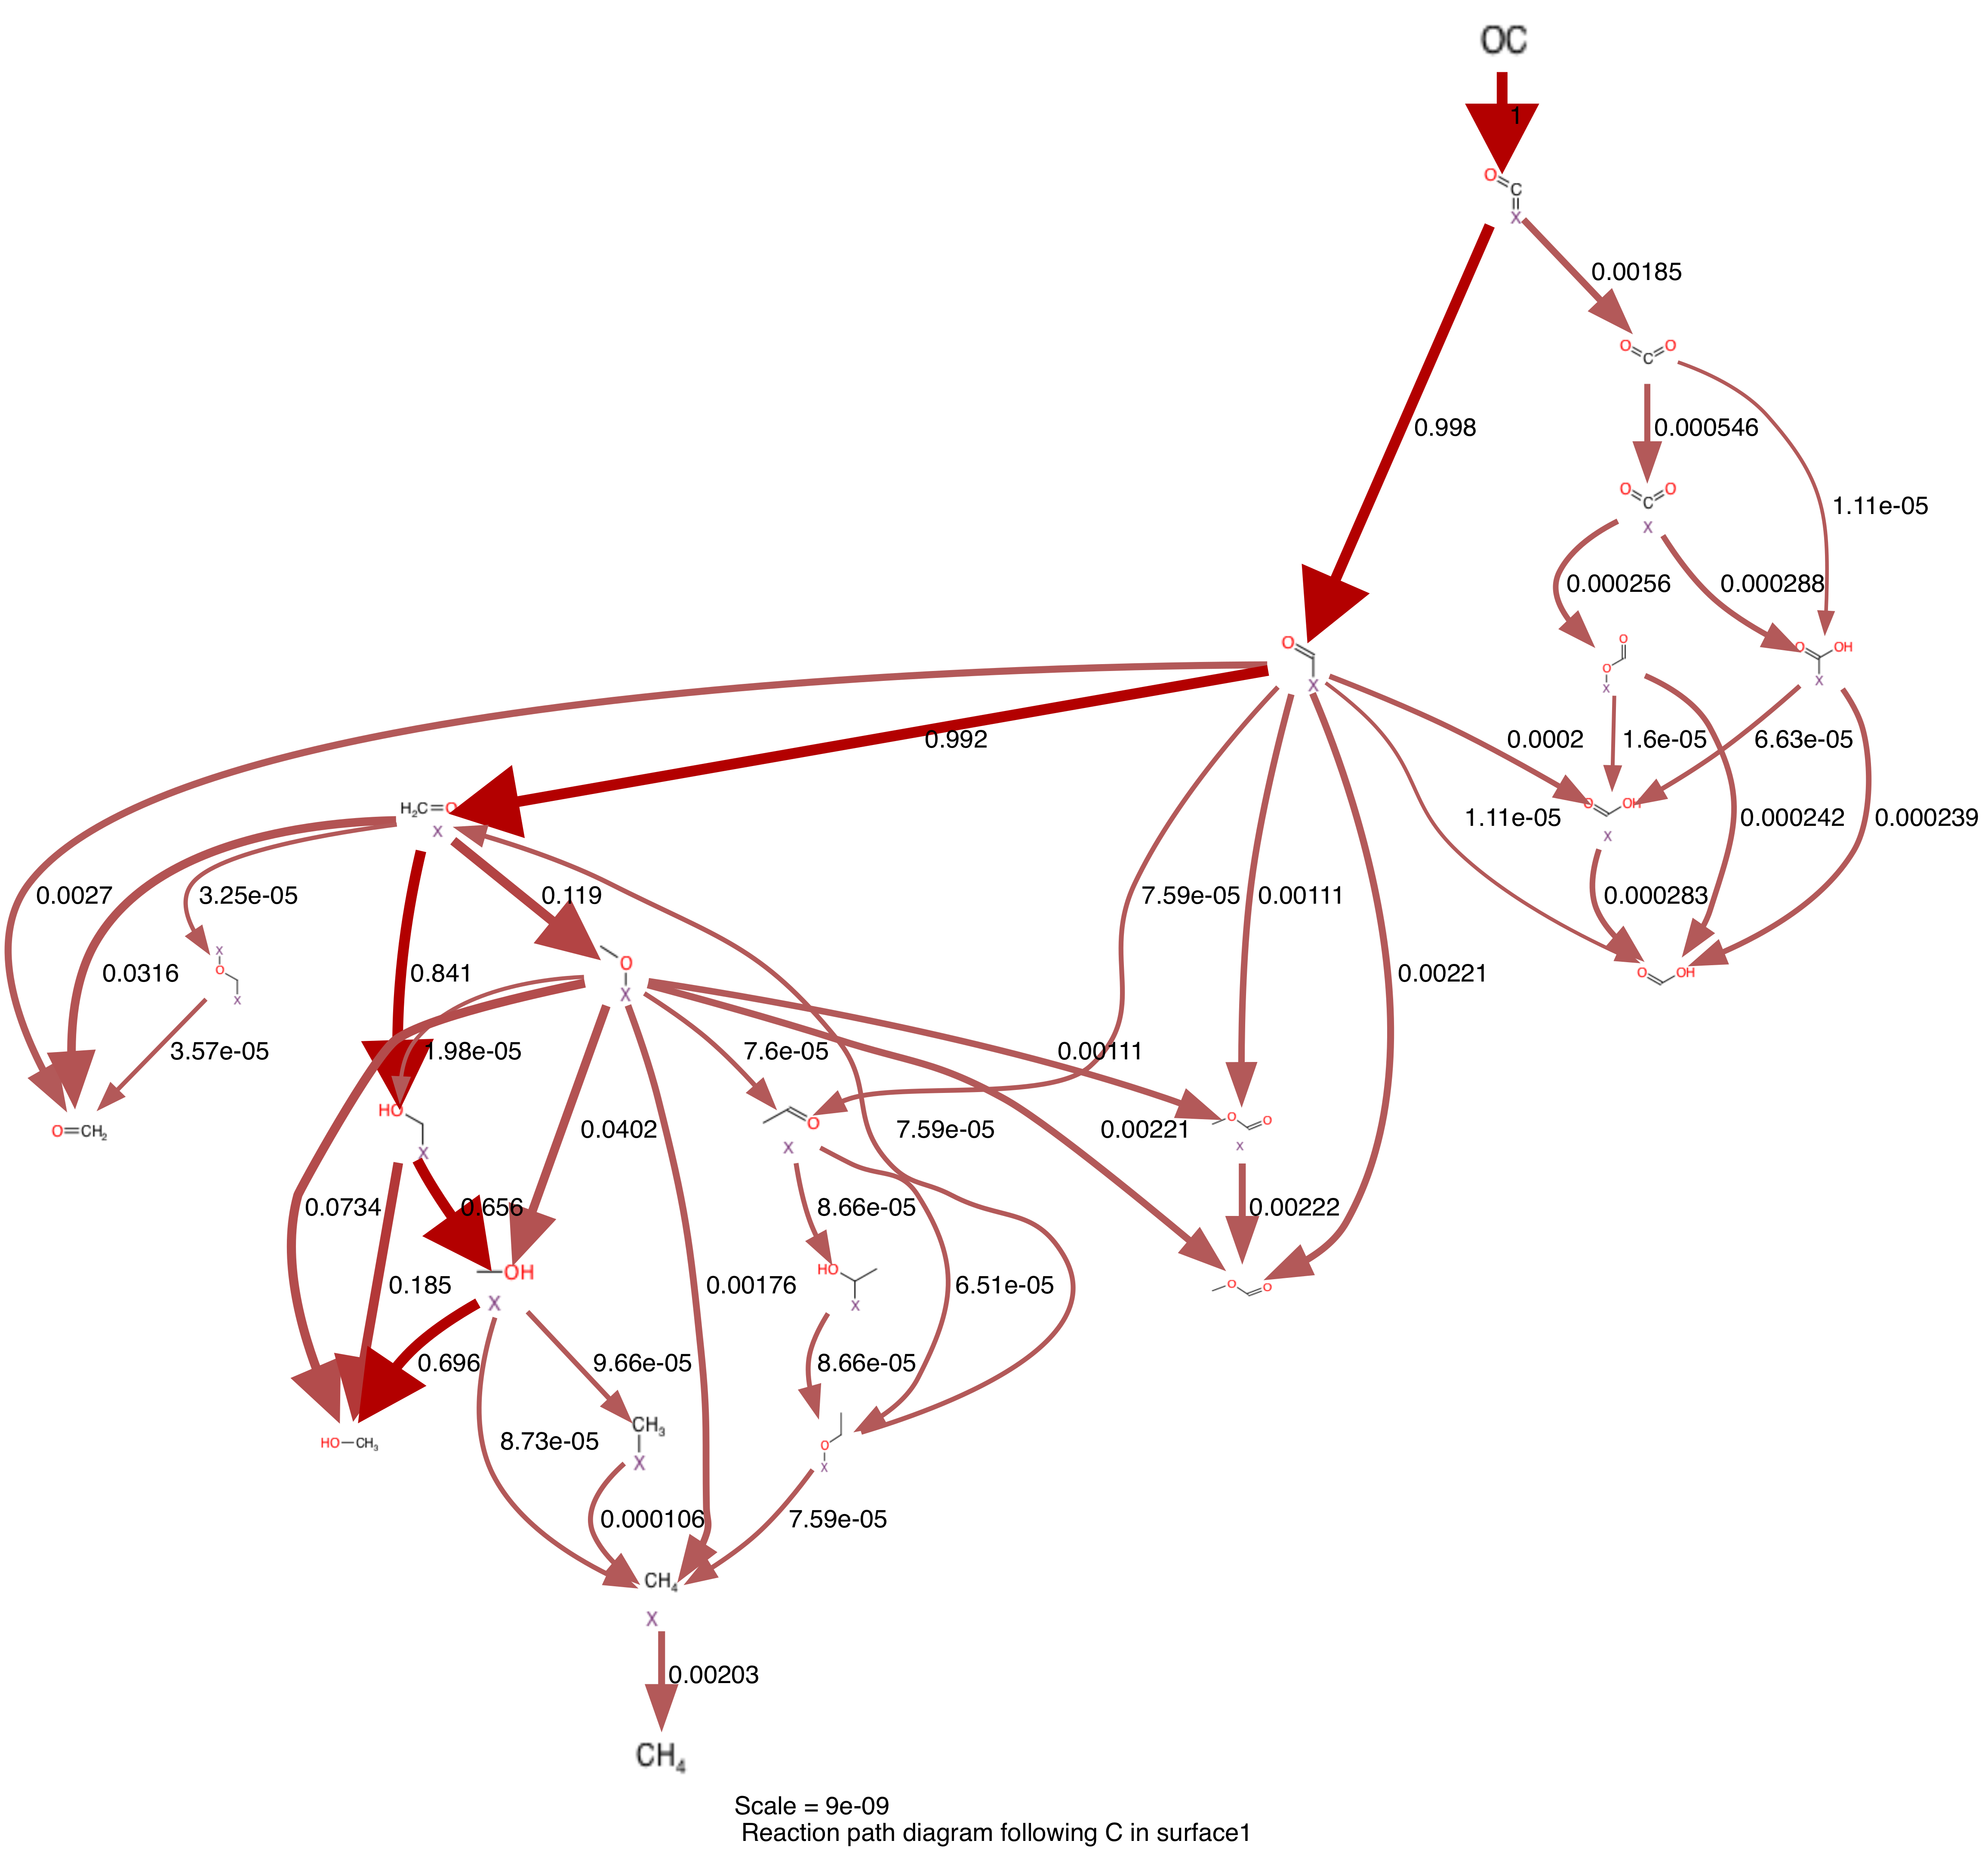

In [14]:
file = sbr_ss.flux_path + '/reaction_path_C_surface1_end-pretty.png'
Image(filename=file, width = 800) 

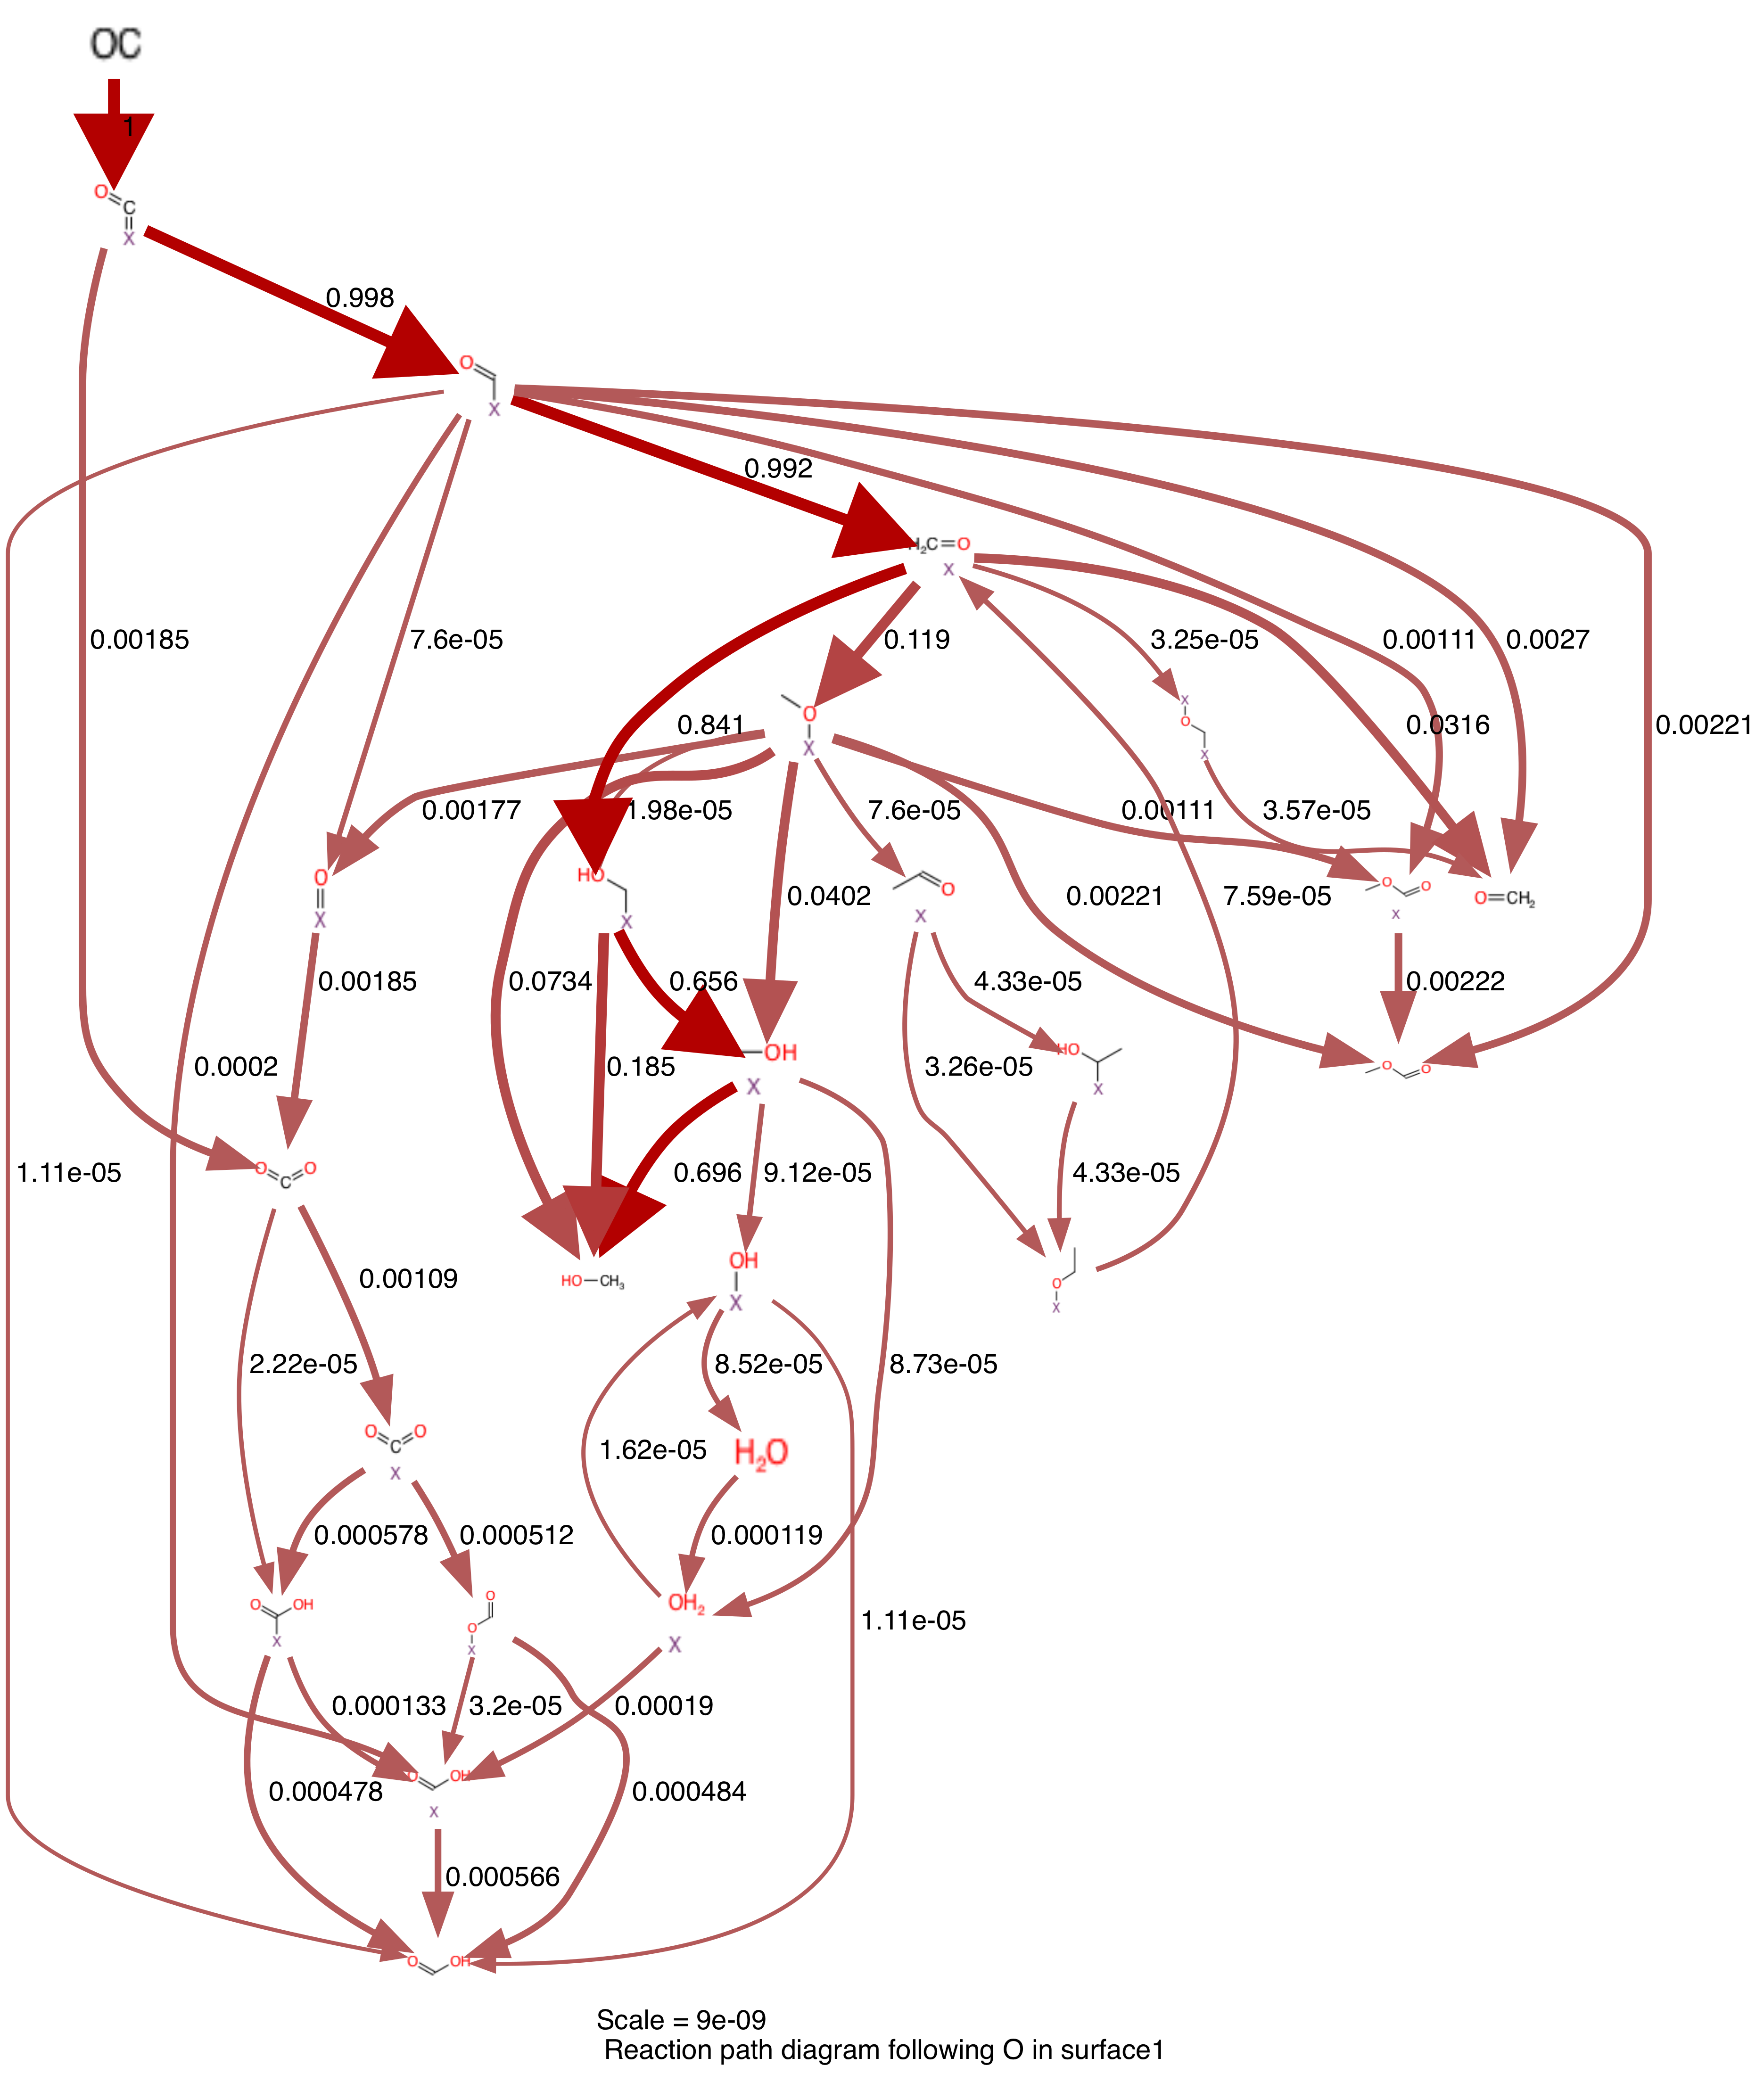

In [13]:
file = sbr_ss.flux_path + '/reaction_path_O_surface1_end-pretty.png'
Image(filename=file, width = 800) 

## potential energy surface 
enthalpy vs reaction coordinate

1 eV = ~96 kj/mol

In [15]:
sbr_ss.surf.species_names

['X(1)',
 'H*(10)',
 'O*(11)',
 'OH*(12)',
 'H2O*(13)',
 'CO*(14)',
 'CO2*(15)',
 'HCO*(16)',
 'HCOO*(17)',
 'COOH*(18)',
 'HCOOH*(19)',
 'CH2O*(20)',
 'CH3O*(21)',
 'CH3O2*(22)',
 'CH3OH*(23)',
 'CH3X(35)',
 'CH3OX(49)',
 'H2X(53)',
 'CH2OX2(55)',
 'SX(56)',
 'SX(58)',
 'SX(62)',
 'COXX(63)',
 'CHOX2(64)',
 'HOCOXX(65)',
 'CH4X(66)',
 'SX(206)',
 'SX(213)',
 'SX(225)',
 'SX(249)',
 'SX(351)',
 'SX(387)',
 'SX(421)',
 'SX(440)',
 'SX(870)',
 'SX(1035)']

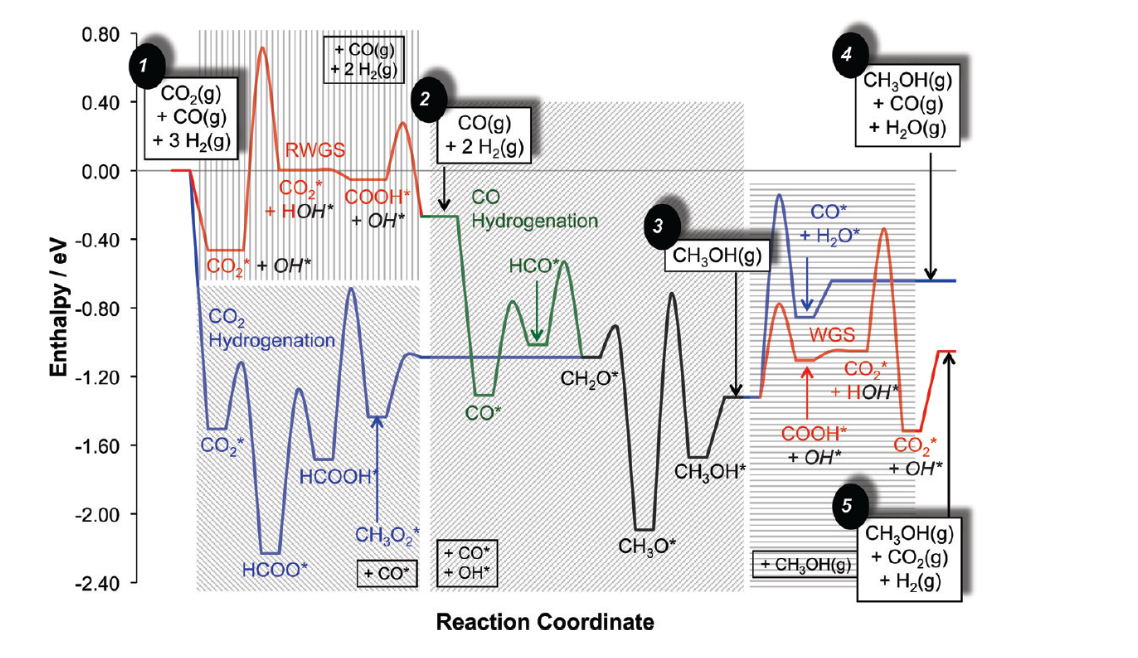

In [17]:
file = ('../images/Grabow_plots/Grabow_PES.png')
Image(filename=file, width = 900) 

we are missing CO2 mechanism, so let's compare thermo and barriers for CO2, CO2X, HCOOX, HCOOHX, CH3O2X, and CH2OX

## make function for finding all reactions containing a species

In [ ]:
from energydiagram import ED
diagram = ED()

In [ ]:
def get_h_ev(species, temp):
    """
    gets species enthalpy in eV. 
    species is a cantera Species object
    """
    h_eV = (species.thermo.h(temp)/1000**2)/96
    print(f'{species.name} enthalpy = {h_eV} eV')
    return h_eV

In [ ]:
def get_ea_ev(reaction):
    """
    gets reaction Ea in eV. 
    reaction is a cantera Reaction object
    """
    Ea_eV = (reaction.rate.activation_energy/1000**2)/96
    print(f'{reaction.equation} enthalpy = {Ea_eV} eV')
    return Ea_eV

In [ ]:
def find_reactions(species, temp):
    """
    find all reactions that involve a certain species.
    species is a species object
    rxns is a dictionary, reaction equation is the key, reaction object is the value
    """
    rxns = {}
    species_names = [i.name for i in species]
    species_ea = get_h_ev(species[1], temp)
    
    for i,j in enumerate(sbr_ss.gas.reaction_equations()):
        if all(x in j for x in species_names):
            rxns[j] = sbr_ss.gas.reaction(i)
            Ea = species_ea + (sbr_ss.gas.reaction(i).rate.activation_energy/1000**2)/96
            print(j, Ea)
            
    for i,j in enumerate(sbr_ss.surf.reaction_equations()):
        if all(x in j for x in species_names):
            rxns[j] = sbr_ss.surf.reaction(i)
            Ea = species_ea + (sbr_ss.surf.reaction(i).rate.activation_energy/1000**2)/96
            print(j, Ea)
            
    return rxns

reference energy as we calculate it for CO2, CO, 3H2 gas reactants is even more negative, instead of being above the intermediates. There is something missing here. 

In [ ]:
reactant1 = sbr_ss.gas.species("CO(3)")
reactant2 = sbr_ss.gas.species("CO2(4)")
reactant3 = sbr_ss.gas.species("H2(2)")
H_eV_co = get_h_ev(reactant1, 499)
H_eV_co2 = get_h_ev(reactant2, 499)
H_eV_h2 = get_h_ev(reactant3, 499)

h_eV_ref = H_eV_co + H_eV_co2 + 3*H_eV_h2
h_eV_ref

In [ ]:
reactant = sbr_ss.gas.species("CO2(4)")
product = sbr_ss.surf.species("CO2*(15)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.99,"CO2(4)")
diagram.add_level(-3.94,"Ea1") #"CO2(4) + X(1) <=> CO2*(15)")

In [ ]:
reactant = sbr_ss.surf.species("CO2*(15)")
product = sbr_ss.surf.species("HCOO*(17)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.93,"CO2*(15)")
diagram.add_level(-3.08,"Ea2") #"CO2*(15) + H*(10) <=> HCOO*(17) + X(1)")

In [ ]:
reactant = sbr_ss.surf.species("HCOO*(17)")
product = sbr_ss.surf.species("HCOOH*(19)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.95,"HCOO*(17)")
diagram.add_level( -3.43,"Ea3") # "H*(10) + HCOO*(17) <=> HCOOH*(19) + X(1)")

In [ ]:
reactant = sbr_ss.surf.species("HCOOH*(19)")
product = sbr_ss.surf.species("CH3O2*(22)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-4.36,"HCOOH*(19)")
diagram.add_level(-2.79,"Ea4") #H*(10) + HCOOH*(19) <=> CH3O2*(22) + X(1)

In [ ]:
reactant = sbr_ss.surf.species("CH3O2*(22)")
product = sbr_ss.surf.species("CH2O*(20)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.83,"CH3O2*(22)")
diagram.add_level(-1.59,"Ea5") #H*(10) + HCOOH*(19) <=> CH3O2*(22) + X(1)

In [ ]:
reactant = sbr_ss.surf.species("CH2O*(20)")
H_eV = get_h_ev(reactant, 499)
diagram.add_level(-1.59,"CH2O*(20)")

In [ ]:
diagram.plot(show_IDs=True, ylabel="Energy / $eV$") # this is the default ylabel

In [ ]:
diagram.bottom_texts[0]


In [ ]:
file = ('../images/Grabow_plots/Grabow_PES_CO2.png')
Image(filename=file, width = 600) 

### get equilibrium surface coverages

In [ ]:
for i in zip(sbr_ss.surf.species_names, sbr_ss.surf.X):
    print(i)

it appears that not much CO2 is adsorbed. this could be why we do not see much in that path

In [ ]:
sbr_ss.species_path + "/SX(386).png"

## Pictures of Key species

In [ ]:
file = sbr_ss.species_path + "/SX(386).png"
Image(filename=file, width = 100) 

In [ ]:
file = sbr_ss.species_path + "/CO2*(15).png"
Image(filename=file, width = 100) 

In [ ]:
file = sbr_ss.species_path + "/HCOO*(17).png"
Image(filename=file, width = 80) 

In [ ]:
file = sbr_ss.species_path + "/HCOOH*(19).png"
Image(filename=file, width = 80) 

In [ ]:
file = sbr_ss.species_path + "/CH3O2*(22).png"
Image(filename=file, width = 70) 

In [ ]:
file = sbr_ss.species_path + "/CH2O*(20).png"
Image(filename=file, width = 70) 

## sandbox for PES diagram script

In [ ]:
sbr_ss.gas.reaction(1).reactants

In [ ]:
sbr_ss.gas.reaction(1).rate.activation_energy

In [ ]:
for i in sbr_ss.gas.reaction(1).reactants:
    print(i)


In [ ]:
reactants = [i for i in sbr_ss.gas.reaction(1).reactants]
reactants

# testing PES plotter

In [11]:
import cantera as ct
from IPython.display import Image
from sbr import sbr
%matplotlib inline

import os
import sys
sys.path.append(f'{os.getcwd()}/tools')
import pes_plot


# get current RMG model:
# get current RMG model:
rmg_model_folder = "../../../meOH-synthesis/"
cti_file_path = rmg_model_folder + "base/cantera/chem_annotated.cti"

In [12]:
pes_plot_1 = pes_plot.pes_plot(cti_file_path)

In [13]:
pes_plot_1.surf.species_names

['X(1)',
 'H*(10)',
 'O*(11)',
 'OH*(12)',
 'H2O*(13)',
 'CO*(14)',
 'CO2*(15)',
 'HCO*(16)',
 'HCOO*(17)',
 'COOH*(18)',
 'HCOOH*(19)',
 'CH2O*(20)',
 'CH3O*(21)',
 'CH3O2*(22)',
 'CH3OH*(23)',
 'CH3X(35)',
 'CH3OX(49)',
 'H2X(53)',
 'CH2OX2(55)',
 'SX(56)',
 'SX(58)',
 'SX(62)',
 'COXX(63)',
 'CHOX2(64)',
 'HOCOXX(65)',
 'CH4X(66)',
 'SX(206)',
 'SX(213)',
 'SX(225)',
 'SX(249)',
 'SX(351)',
 'SX(387)',
 'SX(421)',
 'SX(440)',
 'SX(870)',
 'SX(1035)']

In [21]:
pes_plot_1.plot_pes_diagram(
    ["HCOOH*(19)","CH2O*(20)"],
    width=20, 
    height=40, 
    offset = 0.01,
    dimension = 10,
    space = 10, 
    combined=True
)

CH2O*(20) enthalpy = -1.5735850142121544 eV
CH2O*(20) + OH*(12) <=> H*(10) + HCOOH*(19) -1.5735850142121544
CH2O*(20) + HCOO*(17) <=> HCO*(16) + HCOOH*(19) -1.5735850142121544
CH2O*(20) + COOH*(18) <=> HCO*(16) + HCOOH*(19) -1.5735850142121544
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -1.208356680878821
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -1.208356680878821
CH2O*(20) + HCOOH*(19) <=> CH3O*(21) + HCOO*(17) -1.3254215142121544
CH2O*(20) + HCOOH*(19) <=> CH3O*(21) + COOH*(18) -1.166124430878821
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -1.208356680878821
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -1.208356680878821
CH2O*(20) + HCOOH*(19) <=> CH3OX(49) + HCOO*(17) -1.5735850142121544
CH2O*(20) + HCOOH*(19) <=> CH3OX(49) + COOH*(18) -1.5735850142121544


AttributeError: 'pes_reaction' object has no attribute 'links'

In [5]:
len(pes_plot_1.diagram.links)

56

## Compare to Bjarne's mechanism